In [2]:
from __future__ import division

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from PIL import Image

In [6]:
from numpy.linalg import norm
from random import normalvariate
from math import sqrt

In [7]:
%matplotlib inline

In [8]:
img_file = "spideymeme.jpeg"

In [9]:
image = np.array(Image.open(img_file))

In [10]:
image = image / 255
row, col, _ = image.shape
print("pixels: " + str(row) + "*" + str(col))

pixels: 720*1280


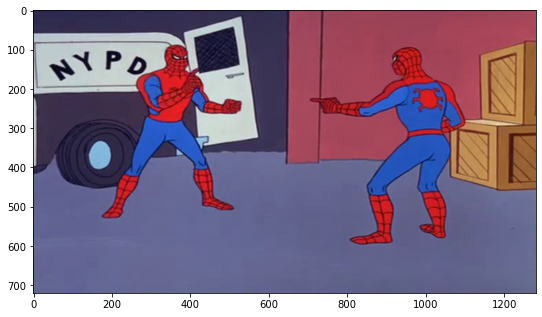

In [11]:
fig = plt.figure(figsize=(9,6))
#a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(image)
#a.set_title("Castle Hill, Budapest")
plt.show()

In [12]:
img_r = image[:,:,0]
img_g = image[:,:,1]
img_b = image[:,:,2]
#row, col = img_r.shape
#print("size: " + str(row) + "*" + str(col))

In [13]:
og_size = image.nbytes
print("Original size of image (bytes): " + str(og_size))

Original size of image (bytes): 22118400


In [14]:
def class_svd(A, epsilon=1e-10):
    m, n = A.shape
    U = []
    singulars = []
    V = []
    # find singulars
    A_square = np.dot(A, A.T)
    e_vals, e_vecs = np.linalg.eig(A_square)
    for i in range(len(e_vals)):
        if e_vals[i] > 0:
            singulars.append(sqrt(e_vals[i]))
        else:
            singulars.append(0)
    #find V
    A_square_V = np.dot(A.T, A)
    e_vals_v, e_vecs_v = np.linalg.eig(A_square_V)
    e_vecs_v = e_vecs_v.T
    for i in range(len(e_vals_v)):
        if e_vals_v[i] < epsilon:
            e_vals_v[i] = 0
    for i in range(len(e_vals_v)):
        for j in range(len(e_vecs_v[i])):
            if abs(e_vecs_v[i][j]) < epsilon:
                e_vecs_v[i][j] = 0
        V.append(e_vecs_v[i].T)
    V = np.array(V)
    # find U
    for i in range(len(singulars)):
        U.append(np.dot(A, np.array(e_vecs_v[i]).T) / singulars[i])
    U = np.array(U)
    U = U.T
    # turn singulars list into diagonal matrix
    sigma = np.zeros(shape= A.shape)
    for i in range(len(singulars)):
        sigma[i][i] = singulars[i]
    return U, sigma, V

In [18]:
U_r, d_r, V_r = class_svd(img_r) 
U_g, d_g, V_g = class_svd(img_g) 
U_b, d_b, V_b = class_svd(img_b)

Around 50 is where a complete dropoff of singular values happens so we'll say k=50


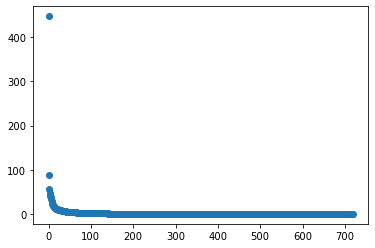

In [50]:
plt.scatter(np.arange(0, len(d_r.diagonal()), 1), d_r.diagonal())
print('Around 50 is where a complete dropoff of singular values happens so we\'ll say k=50')
k = 50

In [51]:
row1, col1 = U_r.shape
row2, col2 = d_r.shape
row3, col3 = V_r.shape
print("size: {}, {}, {}, {}, {}, {}".format(row1, col1, row2, col2, row3, col3))
matrix_storage = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_g]])
print("Size of matrices to store (bytes): " + str(matrix_storage))

size: 720, 720, 720, 1280, 1280, 1280
Size of matrices to store (bytes): 125644800


In [52]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[:k]
d_g_k = d_g[:k]
d_b_k = d_b[:k]
d_r_k = d_r_k[:,:k]
d_g_k = d_g_k[:,:k]
d_b_k = d_b_k[:,:k]

row1, col1 = U_r_k.shape
row2, col2 = d_r_k.shape
row3, col3 = V_r_k.shape
print("size: {}, {}, {}, {}, {}, {}".format(row1, col1, row2, col2, row3, col3))

size: 720, 50, 50, 50, 50, 1280


In [53]:
compressed_size = sum([matrix.nbytes for matrix in[U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print("Compressed matrices size (bytes): " + str(compressed_size))

Compressed matrices size (bytes): 4860000


In [54]:
compression_ratio = compressed_size / og_size
print("Compression ratio: " + str(compression_ratio))

Compression ratio: 0.2197265625


In [55]:
#img_r_approx = np.dot(U_r_k, np.dot(d_r_k, V_r_k))
#img_g_approx = np.dot(U_g_k, np.dot(d_g_k, V_g_k))
#img_b_approx = np.dot(U_b_k, np.dot(d_b_k, V_b_k))
img_r_approx = np.dot(np.dot(U_r_k, d_r_k), V_r_k)
img_g_approx = np.dot(np.dot(U_g_k, d_g_k), V_g_k)
img_b_approx = np.dot(np.dot(U_b_k, d_b_k), V_b_k)

In [56]:
reconstructed_img = np.zeros((row,col,3))
reconstructed_img[:,:,0] = img_r_approx
reconstructed_img[:,:,1] = img_g_approx
reconstructed_img[:,:,2] = img_b_approx

/Users/manastaneja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/manastaneja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/manastaneja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [57]:
reconstructed_img[reconstructed_img < 0] = 0
reconstructed_img[reconstructed_img > 1] = 1

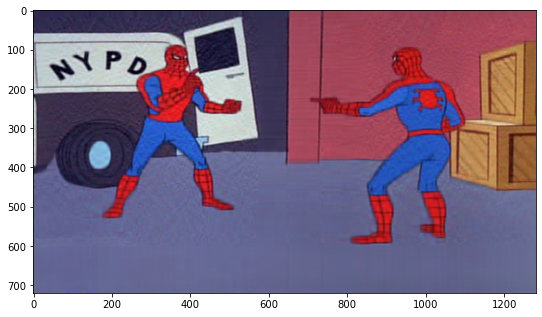

In [58]:
fig = plt.figure(figsize=(9,6))
imgplot = plt.imshow(reconstructed_img)
plt.show()